In [2]:
import pandas as pd
import numpy as np

from ipynb.fs.full.data_preprocessing_function import preprocessing_data

In [2]:
#read data
df_list=[]
for x in range(1, 17):
    person_number = x
    
    person_number = str('%02d' % person_number)

    calories = []
    distance = []
    l_act = []
    m_act = []
    r_heart = []
    sedentary = []
    sleep_score = []
    sleep = []
    hr_zone = []
    v_act = []
    wellness = []
    display('P'+person_number)
    try:
        calories = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/calories.json')
        distance = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/distance.json')
        l_act = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/lightly_active_minutes.json')
        m_act = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/moderately_active_minutes.json')
        r_heart = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/resting_heart_rate.json')
        sedentary = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/sedentary_minutes.json')
        sleep_score = pd.read_csv('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/sleep_score.csv')
        sleep = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/sleep.json')
        steps = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/steps.json')
        hr_zone = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/time_in_heart_rate_zones.json')
        v_act = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/very_active_minutes.json')
        wellness = pd.read_csv('../osfstorage-archive/pmdata/p'+person_number+'/pmsys/wellness.csv')         
        
        if x in [8,14]:
            '''
            participant 8 and 14 have additional personalized heart rate columns
            '''
            preprocessing_result = preprocessing_data(person_number, calories, distance, l_act, m_act, r_heart, sedentary, sleep_score, sleep, steps, hr_zone, v_act, wellness)
            display('P'+person_number+' extra columns dropped')
        else:
            preprocessing_result = preprocessing_data(person_number, calories, distance, l_act, m_act, r_heart, sedentary, sleep_score, sleep, steps, hr_zone, v_act, wellness)

        

        df_list.append(preprocessing_result)
        
    except:
        print(person_number+' exception from loading files')
        pass
        




'P01'

'P02'

'P03'

'P04'

'P05'

'P06'

'P07'

'P08'

'P08 extra columns dropped'

'P09'

'P10'

'P11'

'P12'

12 exception from loading files


'P13'

13 exception from loading files


'P14'

'P14 extra columns dropped'

'P15'

'P16'

In [3]:
len(df_list)

14

In [4]:
agg_df = pd.concat(df_list) #aggregate participants' data

In [5]:
#agg_df = agg_df.dropna(subset=['readiness']) #drop where readiness has nan value

In [6]:
for x in [i for i in agg_df.columns]:
    if agg_df[x].isnull().any() == True:
        print(f'{x};; Not null: {agg_df[x].isnull().value_counts()[0]}, Null: {agg_df[x].isnull().value_counts()[1]}')

readiness;; Not null: 1578, Null: 516
calories;; Not null: 2042, Null: 52
distance;; Not null: 2017, Null: 77
l_act;; Not null: 2092, Null: 2
m_act;; Not null: 2092, Null: 2
resting_heart;; Not null: 1803, Null: 291
sedentary;; Not null: 2092, Null: 2
sleep_overall_score;; Not null: 1782, Null: 312
sleep_composition_score;; Not null: 1782, Null: 312
sleep_revitalization_score;; Not null: 1782, Null: 312
sleep_duration_score;; Not null: 1782, Null: 312
deep_sleep_in_minutes;; Not null: 1782, Null: 312
sleep_resting_heart_rate;; Not null: 1782, Null: 312
sleep_restlessness;; Not null: 1782, Null: 312
sleep_duration;; Not null: 1822, Null: 272
sleep_minutesToFallAsleep;; Not null: 1822, Null: 272
sleep_minutesAsleep;; Not null: 1822, Null: 272
sleep_minutesAwake;; Not null: 1822, Null: 272
sleep_minutesAfterWakeup;; Not null: 1822, Null: 272
sleep_timeInBed;; Not null: 1822, Null: 272
sleep_efficiency;; Not null: 1822, Null: 272
main_sleep;; Not null: 1822, Null: 272
steps;; Not null: 201

In [7]:
#readiness -> shift each data for one day
#calories personal mean
#distance personal mean
#l_act personal mean
#m_act personal mean
#resting_heart mean
#sedentary personal mean

###personal mean
#sleep_overall_score mean
#sleep_composition_score mean
#sleep_revitalization_score mean
#sleep_duration_score mean
#deep_sleep_in_minutes mean
#sleep_resting_heart_rate mean
#sleep_restlessness mean
#sleep_duration mean
#sleep_minutesToFallAsleep -> 0
#sleep_minutesAsleep mean
#sleep_minutesAwake mean
#sleep_minutesAfterWakeup -> 0
#sleep_timeInBed mean
#sleep_efficiency mean

#main_sleep -> 1

#steps personal mean
#hr_below_zone1 personal mean
#hr_zone1 personal mean
#hr_zone3 personal mean
#hr_zone2 personal mean
#v_act personal mean

In [8]:
agg_df['sleep_overall_score']

2019-11-01    76.0
2019-11-02    79.0
2019-11-03    71.0
2019-11-04    68.0
2019-11-05    73.0
              ... 
2020-03-27    86.0
2020-03-28    83.0
2020-03-29    83.0
2020-03-30    89.0
2020-03-31     NaN
Name: sleep_overall_score, Length: 2094, dtype: float64

In [9]:
import matplotlib.pyplot as plt

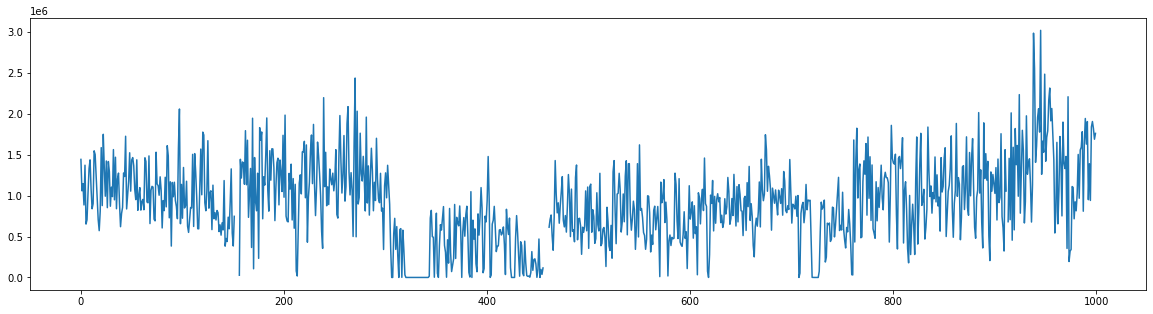

In [10]:
fig = plt.figure(figsize=(20,5))
plt.plot(agg_df.reset_index()['distance'][:1000])

#does sleep score has trend?

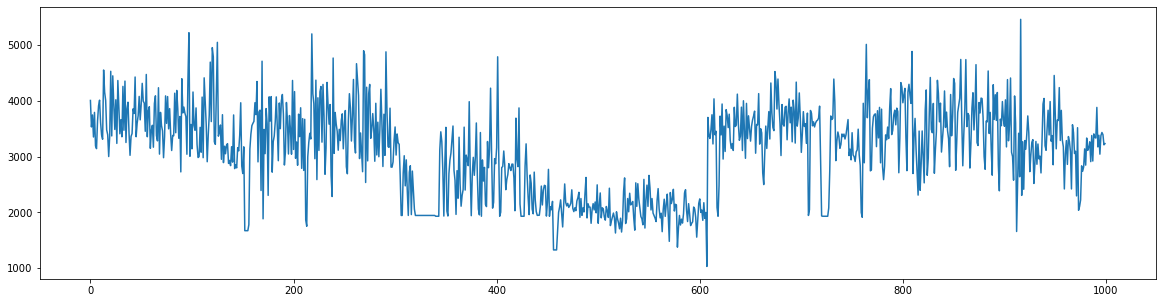

In [11]:
fig = plt.figure(figsize=(20,5))
plt.plot(agg_df.reset_index()['calories'][:1000])

In [12]:
agg_df['main_sleep'].value_counts()

1.0    1814
0.0       8
Name: main_sleep, dtype: int64

In [13]:
agg_df['sleep_minutesAfterWakeup'].value_counts()

0.0     1416
1.0      173
3.0       45
4.0       41
5.0       38
2.0       26
6.0       23
7.0       21
8.0       11
9.0       10
10.0       9
12.0       2
13.0       2
18.0       1
11.0       1
14.0       1
15.0       1
33.0       1
Name: sleep_minutesAfterWakeup, dtype: int64

In [14]:
#ADD gender, height, age

In [49]:
overview = pd.read_excel('../osfstorage-archive/pmdata/participant-overview.xlsx')

In [50]:
overview = overview.set_axis(overview.iloc[0,:],axis='columns')

In [66]:
overview = overview.set_index('Participant ID',drop=True)

In [70]:
overview

,Age,Height,Gender,A or B person,Max heart rate,Date,Minutes,Seconds,Stride walk,Stride run
Participant ID,,,,,,,,,,
Participant ID,Age,Height,Gender,A or B person,Max heart rate,Date,Minutes,Seconds,Stride walk,Stride run
p01,48,195,male,A,182,2019-11-26 00:00:00,29,33,80.9,102.9
p02,60,180,male,A,169,2019-12-15 00:00:00,23,51,74.7,92.4
p03,25,184,male,A,157,2019-12-30 00:00:00,33,22,NaN,NaN
p04,26,163,female,A,195,2019-11-19 00:00:00,22,13,67.3,110.2
p05,35,176,male,A,184,2019-12-23 00:00:00,32,40,73,94.3
p06,42,179,male,B,181,2019-12-01 00:00:00,23,19,73.04,97.6
p07,26,177,male,B,NaN,2019-11-19 00:00:00,19,40,73.5,119.5
p08,27,186,male,B,200,2019-11-28 00:00:00,18,47,77.2,103.6
